# Modelos de Regresión

------------------------------------------------------


### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------


Los algoritmos de regresión forman parte de las técnicas de aprendizaje supervisado. Para cada una de las observaciones del conjunto de entrenamiento se necesita conocer la salida deseada o *target*, que en general consideraremos que es un número real.

## 1. Regresión lineal y semilineal

Los modelos de **regresión lineal** son otro de los métodos de aprendizaje automático más empleados y referenciados. En este caso la función de regresión consiste en una combinación lineal de las variables que componen las observaciones. Los **pesos** de esta combinación capturan la correlación entre los valores que toma cada variable y el valor de la salida o *target*. Además se pueden incluir **regularizaciones** tales como LASSO o *ridge* que controlen el sobreajuste. Veremos qué significan y cómo se incorporan.

El modelo lineal se puede extender fácilmente a situaciones que **demanden no-linealidades** mediante la introducción de funciones no lineales en el conjunto de variables de entrada. Básicamente la matriz de datos en la que cada fila es una observación y cada columna una variable se **extiende añadiendo columnas** resultantes de aplicar **funciones no lineales** a las variables de entrada.

Existen varios módulos en scikit learn que implementan modelos de regresión lineal y semilineal: [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) y [`KernelRidge`](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html?highlight=kernelridge#sklearn.kernel_ridge.KernelRidge) entre otros.

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

### 1.1. Generación del dataset

En primer lugar vamos a generar de manera aleatoria $N$ datos de entrada y salida con los que vamos a trabajar. Si te fijas en el código, la variable objetivo, $y$, se genera a partir del producto de una función exponencial y coseno de los datos de entrada, $x$, a la que luego se ha añadido ruido proveniente de una distribución normal y se ha centrado con respecto a dicha variable deseada.

La función generadora de los datos no es lineal, por lo que una regresión lineal no debería de ser el mejor modelo que capture el comportamiento de dichos datos.

A continuación, representaremos una grafica con los datos generados

Text(0, 0.5, 'y')

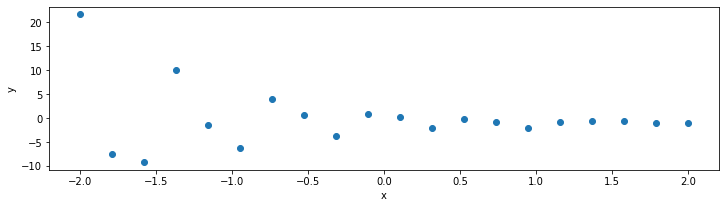

In [2]:
a = 1.2
n = 20
x = np.linspace(-2, 2, n)
y = 2*np.exp(-a*x)*np.cos(3*np.pi*x)
s = .5
y += stats.norm.rvs(loc=0, scale=s, size=n, random_state=42) 
my = np.mean(y)
y -= my
plt.figure(figsize=(12,3))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [3]:
print(x.shape)
print(y.shape)

(20,)
(20,)


In [4]:
X = x[:, np.newaxis]      # x.reshape(-1, 1), al igual que x[:, np.newaxis]  se utiliza para convertir a matriz
print(X.shape)

(20, 1)


### 1.2 Entrenamiento de los modelos

Como ya vimos en un notebook anterior, la forma de utilizar un modelo de Scikit-learn es:



1.   Declarar un objeto de la clase del modelo a usar con la configuración deseada.
2.   Utilizar el método `fit` en los datos de entrenamiento para ajustar los parámetros del modelo.
3.   Predecir en test con el método `predict` para elegir el mejor modelo, o seleccionar los hiperparámetros.



In [5]:
# Regresion lineal
LR = LinearRegression()   # M siempre vale 1!, modelo lineal 
LR.fit(X, y)
yp = LR.predict(X) 

# Regresión ridge
RR = Ridge(alpha=20)    # alpha es el lambda de las transparencias y define el peso de la regularización L2
RR.fit(X, y)
yr = RR.predict(X)


Para crear un modelo no lineal a partir de una regresión lineal, podemos crear variables nuevas a partir de las de entrada con funciones no lineales como el coseno y la función cuadrática. Fíjate en el siguiente ejemplo. En él añadimos 2 nuevas variables a partir de estas transformaciones. Estas variables se añaden como nuevas columnas en tus datos.

In [ ]:
x2 = np.hstack((X, (X**2), np.cos(3*np.pi*X)))

print(x2.shape) 


LR.fit(x2, y)
yp2 = LR.predict(x2)

RR.fit(x2, y)
yr2 = RR.predict(x2)

(20, 3)


> **Ejercicio**: ¿Cómo podríamos definir unas transformaciones para M=4 según lo que conocemos de las transparencias de teoría?

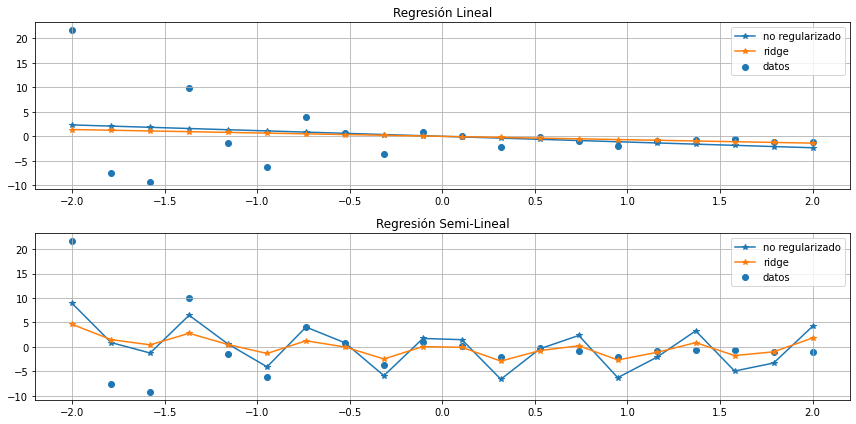

In [ ]:
ff, aa = plt.subplots(2,1,figsize=(12,6))
aa[0].scatter(x, y, label='datos')
aa[0].plot(x, yp, marker='*', label='no regularizado')
aa[0].plot(x, yr, marker='*', label='ridge')
aa[0].set_title('Regresión Lineal')
aa[0].legend()
aa[0].grid()

aa[1].scatter(x, y, label='datos')
aa[1].plot(x, yp2, marker='*',label='no regularizado')
aa[1].plot(x, yr2, marker='*',label='ridge')
aa[1].set_title('Regresión Semi-Lineal')
aa[1].legend()
aa[1].grid()
ff.tight_layout()

### 1.3 Evaluación de los modelos

Los modelos de regresión generalmente se evalúan calculando el **error cuadrático medio** (MSE) o el coeficiente $R^2$.


#### El estadístico $R^2$

$$
R^2 = 1-\frac{\sum_{i=1}^{N_t}{(y_i-\hat{y}_i)^2}}{\sum_{i=1}^{N_t}{(y_i-\bar{y})^2}}
$$donde $N_t$ es el tamaño del conjunto usado para calcular el estadístico, $\hat{y}_i$, $i=1,\dots,N_t$ son las estimaciones hechas por el modelo, $y_i$ ($i=1,\dots,N_t$)  son los *targets* verdaderos e $\bar{y}=1/N_t\sum_{i=1}^{N_t}y_i$ es la media de los *targets* verdaderos. 

- $R^2$ toma un valor máximo de $1.0$ cuando el modelo no comete errores y su valor es decreciente. 

- La manera que tiene de decrecer es una comparación entre la precisión del modelo y la precisión de un modelo trivial consistente en estimar todos los *targets* con la media. 

- Mientras el modelo sea más preciso que estimar con la media, $R^2$ será positivo. Si obtenemos un valor de $R^2$ negativo es porque el modelo comete un error peor que el resultante de estimar todos los targets con su media. 

Alguna de la información útil que scikit-learn nos permite obtener es sobre los parámetros del modelo que se ha ajustado o medidas del rendimiento del mismo como el error cuadrático medio (MSE) o el coeficiente de determinación $R^2$. Ahora los vemos para la regresión semi-lineal de los modelos anteriores.

In [ ]:
print("Regresión semi-lineal no regularizada:")
print('w = ' + str(LR.coef_) + ', b = ' + str(LR.intercept_))
print("MSE: %.2f" % mean_squared_error(y, yp2))
print("Coeficiente de determinación: %.2f" % r2_score(y, yp2))

Regresión semi-lineal:
w = [-1.16634694  0.65264523  5.15440411], b = -1.2195131729190356
MSE: 22.24
Coeficiente de determinación: 0.44


In [ ]:
print("Regresión semi-lineal Ridge:")
print('w = ' + str(RR.coef_) + ', b = ' + str(RR.intercept_))
print("MSE: %.2f" % mean_squared_error(y, yr2))
print("Coeficiente de determinación: %.2f" % r2_score(y, yr2))

Regresión semi-lineal Ridge:
w = [-0.69484499  0.60711488  1.77359279], b = -0.9833752531493442
MSE: 28.59
Coeficiente de determinación: 0.28


Recuerda que para evaluar correctamente un modelo habría que utilizar datos del conjunto de test, no utilizados en el ajuste de los parámetros.

Además, los modelos de regresión lineal pueden combinarse con los principios de los algoritmos de reducción de dimensionalidad dando lugar a los algoritmos **Partial Least Squares** y de **regresión en componentes principales**.

Estas ideas son tratadas por modelos como la **regresión con métodos kernel** o los **Procesos Gaussianos**, que se salen de los objetivos del curso.